In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import normal as randn, multivariate_normal as randmn
from collections.abc import Iterable


In [2]:
from algorithms.score_based import *

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def reference_score(x):
    if isinstance(x, (int, float)):
        return np.array([-x]).reshape(-1, 1)
    return -x.reshape(-1, 1)

In [5]:
def compute_delays_false_alarms(runs, S_list, threshold, tau):
    delays = []
    false_alarms = 0
    not_detected = 0

    for i in range(runs):

        S = S_list[i]
        res = np.ma.flatnotmasked_edges(np.ma.masked_array(S, S <= threshold))
        if isinstance(res, Iterable):
            imin, _ = res
            if imin - tau <= 0:
                print(imin, i)
                false_alarms += 1
            else:
                delays.append(imin - tau)
        else:
            not_detected +=1

    if not_detected == runs:
        return 0, 0, 0, not_detected

    delays = np.array(delays)
    mean_delay = np.round(delays.mean(), 1)
    std_delay = np.round(delays.std(), 1)

    return false_alarms, mean_delay, std_delay, not_detected

## Univariate mean shift 

### Linear

In [23]:
def train_params(eta_list, lambda_list, alpha_list):
    n = 300
    tau = 150
    runs = 10
    sigma = 0.2
    eta = 1 
    dim = 1

    np.random.seed(1)
    for eta in eta_list:
        for l in lambda_list:
            for a in alpha_list:
                
                # threshold 
                S_0 = np.empty((runs-1, tau))
                for item in range(runs-1):
                    X = sigma * randn(size=tau).reshape((tau, dim, 1))                
                    model = ChangePointDetector(d_dim=dim, x_dim=dim, lambda_=l, alpha=a, basis=PolyBasis(1, dim), reference_score=reference_score)
                    S, _ = model.run(X, eta)
                    S_0[item] = S
                threshold = np.round(np.max(S_0), 4)
                print('threshold = ', threshold)


                S_list = np.empty((runs, n))
                for item in range(runs):
                    X = sigma * randn(size=n).reshape((n, dim, 1))      
                    X[tau:] += 2*sigma          
                    model = ChangePointDetector(d_dim=dim, x_dim=dim, lambda_=l, alpha=a, basis=PolyBasis(1, dim), reference_score=reference_score)
                    S, _ = model.run(X, eta)
                    S_list[item] = S

                false_alarms, mean_delay, std_delay, not_detected = compute_delays_false_alarms(runs, S_list, threshold, tau)
                print(f'eta = {np.round(eta, 4)}, lambda = {np.round(l, 4)}, alpha = {np.round(a, 4)}', ' False alarms:', false_alarms, 'DD : ', mean_delay, '±', std_delay, 'not detected: ', not_detected)
    return S_list

In [24]:
train_params([0.001, 0.01, 0.1, 0.5, 1, 2, 5], [1, 2, 5, 10], [1e-3])

threshold =  0.0003
eta = 0.001, lambda = 1, alpha = 0.001  False alarms: 0 DD :  5.8 ± 3.8 not detected:  5
threshold =  0.0002
146 8
eta = 0.001, lambda = 2, alpha = 0.001  False alarms: 1 DD :  14.0 ± 3.6 not detected:  6
threshold =  0.0001
eta = 0.001, lambda = 5, alpha = 0.001  False alarms: 0 DD :  8.3 ± 1.2 not detected:  7
threshold =  0.0
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
2 9
eta = 0.001, lambda = 10, alpha = 0.001  False alarms: 10 DD :  nan ± nan not detected:  0


/var/folders/g6/yf_55rmd4s77kys7xw17p54m0000gn/T/ipykernel_24602/1433940887.py:24: RuntimeWarning: Mean of empty slice.
  mean_delay = np.round(delays.mean(), 1)


threshold =  0.0016
93 4
91 6
eta = 0.01, lambda = 1, alpha = 0.001  False alarms: 2 DD :  9.5 ± 4.4 not detected:  0
threshold =  0.0014
eta = 0.01, lambda = 2, alpha = 0.001  False alarms: 0 DD :  10.4 ± 10.2 not detected:  1
threshold =  0.0005
eta = 0.01, lambda = 5, alpha = 0.001  False alarms: 0 DD :  10.3 ± 6.9 not detected:  4
threshold =  0.0003
140 5
eta = 0.01, lambda = 10, alpha = 0.001  False alarms: 1 DD :  4.7 ± 2.6 not detected:  6
threshold =  0.0033
120 1
140 6
eta = 0.1, lambda = 1, alpha = 0.001  False alarms: 2 DD :  8.6 ± 2.3 not detected:  0
threshold =  0.0049
142 6
eta = 0.1, lambda = 2, alpha = 0.001  False alarms: 1 DD :  8.8 ± 3.3 not detected:  0
threshold =  0.0059
eta = 0.1, lambda = 5, alpha = 0.001  False alarms: 0 DD :  12.5 ± 3.3 not detected:  0
threshold =  0.0008
63 0
79 3
140 4
94 6
142 7
131 8
eta = 0.1, lambda = 10, alpha = 0.001  False alarms: 6 DD :  9.5 ± 5.7 not detected:  0
threshold =  0.012
eta = 0.5, lambda = 1, alpha = 0.001  False alar

array([[ 0.00000000e+00, -3.21555179e-06, -3.03460884e-07, ...,
         4.61098713e+00,  4.65420741e+00,  4.66470081e+00],
       [ 0.00000000e+00, -2.54993254e-03, -2.55662477e-03, ...,
         4.85922270e+00,  4.92417117e+00,  4.90809891e+00],
       [ 0.00000000e+00,  2.52489966e-03,  2.55056456e-03, ...,
         5.10537543e+00,  5.14459837e+00,  5.13350160e+00],
       ...,
       [ 0.00000000e+00,  4.83991728e-04,  5.06392566e-04, ...,
         4.02164385e+00,  4.01454664e+00,  4.02871908e+00],
       [ 0.00000000e+00,  7.46669670e-05,  7.39545302e-05, ...,
         4.69780999e+00,  4.71604471e+00,  4.81940117e+00],
       [ 0.00000000e+00,  4.42733319e-04,  4.47979686e-04, ...,
         5.76715283e+00,  5.77360920e+00,  5.76486876e+00]])

In [25]:
train_params([1], [10, 15], [8e-4, 1e-3, 5e-3])

threshold =  0.0026
eta = 1, lambda = 10, alpha = 0.0008  False alarms: 0 DD :  5.4 ± 3.0 not detected:  0
threshold =  0.0059
eta = 1, lambda = 10, alpha = 0.001  False alarms: 0 DD :  9.9 ± 1.5 not detected:  0
threshold =  0.0179
eta = 1, lambda = 10, alpha = 0.005  False alarms: 0 DD :  7.3 ± 2.1 not detected:  0
threshold =  0.0026
132 3
94 5
eta = 1, lambda = 15, alpha = 0.0008  False alarms: 2 DD :  6.9 ± 3.2 not detected:  0
threshold =  0.0025
74 4
50 6
eta = 1, lambda = 15, alpha = 0.001  False alarms: 2 DD :  6.4 ± 1.7 not detected:  0
threshold =  0.0223
eta = 1, lambda = 15, alpha = 0.005  False alarms: 0 DD :  7.1 ± 3.2 not detected:  0


array([[ 0.00000000e+00,  4.79231429e-06,  4.71539732e-06, ...,
         2.29967158e+00,  2.32158736e+00,  2.29734833e+00],
       [ 0.00000000e+00,  4.92618232e-05,  5.03493868e-05, ...,
         2.96631307e+00,  3.02594150e+00,  3.09496920e+00],
       [ 0.00000000e+00, -7.87071715e-06, -3.93190743e-06, ...,
         2.91545651e+00,  2.98671449e+00,  2.99079664e+00],
       ...,
       [ 0.00000000e+00, -7.10616185e-07,  1.96440286e-06, ...,
         3.93826356e+00,  3.94987915e+00,  3.96201624e+00],
       [ 0.00000000e+00, -2.53665937e-05, -1.23081648e-05, ...,
         3.50344538e+00,  3.54292099e+00,  3.48107792e+00],
       [ 0.00000000e+00, -2.25462967e-04, -1.78255479e-04, ...,
         3.58178700e+00,  3.62468443e+00,  3.59972121e+00]])

In [26]:
train_params([1], [10, 11], [5e-4, 8e-4])

threshold =  0.0016
eta = 1, lambda = 10, alpha = 0.0005  False alarms: 0 DD :  5.3 ± 2.9 not detected:  0
threshold =  0.0048
eta = 1, lambda = 10, alpha = 0.0008  False alarms: 0 DD :  9.9 ± 1.5 not detected:  0
threshold =  0.0023
eta = 1, lambda = 11, alpha = 0.0005  False alarms: 0 DD :  8.1 ± 2.3 not detected:  0
threshold =  0.0027
94 5
eta = 1, lambda = 11, alpha = 0.0008  False alarms: 1 DD :  6.3 ± 2.9 not detected:  0


array([[ 0.00000000e+00,  2.28637069e-04,  2.25997203e-04, ...,
         1.56735941e+00,  1.57267105e+00,  1.58344033e+00],
       [ 0.00000000e+00,  8.08696321e-05,  8.07421274e-05, ...,
         2.01242012e+00,  2.05312253e+00,  2.06186998e+00],
       [ 0.00000000e+00,  1.39148718e-04,  1.37557208e-04, ...,
         1.31746488e+00,  1.32469121e+00,  1.31013048e+00],
       ...,
       [ 0.00000000e+00,  4.04114932e-04,  4.18068960e-04, ...,
         1.56348343e+00,  1.58889860e+00,  1.60630059e+00],
       [ 0.00000000e+00,  2.03004461e-04,  2.05284457e-04, ...,
         1.69893390e+00,  1.73035453e+00,  1.78369222e+00],
       [ 0.00000000e+00, -1.81324844e-04, -1.71063725e-04, ...,
         2.79480279e+00,  2.84115873e+00,  2.82381571e+00]])

threshold =  0.001
eta = 1, lambda = 10, alpha = 0.0003  False alarms: 0 DD :  5.3 ± 2.9 not detected:  0


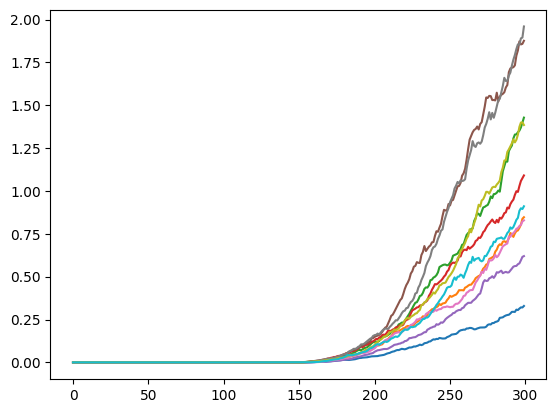

In [30]:
S = train_params([1], [10], [3e-4]).T
plt.plot(S)
plt.show()

threshold =  0.001
eta = 1, lambda = 10, alpha = 0.0003  False alarms: 0 DD :  5.3 ± 2.9 not detected:  0


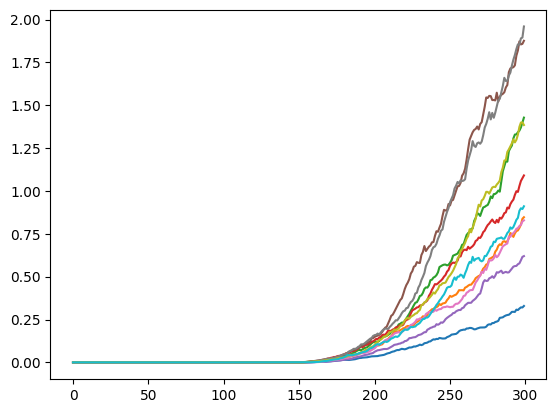

In [24]:
S = train_params([1], [10], [3e-4]).T
plt.plot(S)
plt.show()

### quadratic

In [6]:
# score-based cpd quadratic

def train_params(eta_list, lambda_list, alpha_list, thrs_ad=0):
    n = 300
    tau = 150
    runs = 10
    sigma = 0.2
    dim = 1


    np.random.seed(1)
    for eta in eta_list:
        for l in lambda_list:
            for a in alpha_list:
                
                # threshold 
                S_0 = np.empty((9, tau))
                for item in range(9):
                    X = sigma * randn(size=tau).reshape((tau, dim, 1))                
                    model = ChangePointDetector(d_dim=dim*2, x_dim=dim, lambda_=l, alpha=a, basis=PolyBasis(2, dim))
                    S, _ = model.run(X, eta)
                    S_0[item] = S
                threshold = np.max(S_0) + thrs_ad
                print('threshold = ', threshold)


                S_list = np.empty((runs, n))
                for item in range(runs):
                    X = sigma * randn(size=n).reshape((n, dim, 1))      
                    X[tau:] += 2*sigma          
                    model = ChangePointDetector(d_dim=dim*2, x_dim=dim, lambda_=l, alpha=a, basis=PolyBasis(2, dim))
                    S, _ = model.run(X, eta)
                    S_list[item] = S

                false_alarms, mean_delay, std_delay, not_detected = compute_delays_false_alarms(runs, S_list, threshold, tau)
                print(f'eta = {np.round(eta, 4)}, lambda = {np.round(l, 4)}, alpha = {np.round(a, 5)}', ' False alarms:', false_alarms, 'DD : ', mean_delay, '±', std_delay, 'not detected: ', not_detected)

    return S_list

In [62]:
S = train_params([0.2], [0.3, 0.5, 0.7], [9e-5, 1e-4, 3e-4, 5e-4]).T

threshold =  96.44893718203275
eta = 0.2, lambda = 0.3, alpha = 9e-05  False alarms: 0 DD :  10.4 ± 4.7 not detected:  0
threshold =  64.08652915615176
eta = 0.2, lambda = 0.3, alpha = 0.0001  False alarms: 0 DD :  7.0 ± 2.3 not detected:  0
threshold =  82.07839342037596
eta = 0.2, lambda = 0.3, alpha = 0.0003  False alarms: 0 DD :  8.2 ± 0.7 not detected:  0
threshold =  141.6197277702288
eta = 0.2, lambda = 0.3, alpha = 0.0005  False alarms: 0 DD :  9.4 ± 3.4 not detected:  0
threshold =  35.35408362332305
eta = 0.2, lambda = 0.5, alpha = 9e-05  False alarms: 0 DD :  5.8 ± 3.5 not detected:  0
threshold =  50.37915375105513
95 1
eta = 0.2, lambda = 0.5, alpha = 0.0001  False alarms: 1 DD :  3.5 ± 1.1 not detected:  0
threshold =  71.12972650870358
eta = 0.2, lambda = 0.5, alpha = 0.0003  False alarms: 0 DD :  5.2 ± 2.5 not detected:  0
threshold =  36.670639339565355
eta = 0.2, lambda = 0.5, alpha = 0.0005  False alarms: 0 DD :  6.0 ± 1.4 not detected:  0
threshold =  50.84564029913

threshold =  10.719453640496454
eta = 0.2, lambda = 0.5, alpha = 8e-05  False alarms: 0 DD :  3.3 ± 1.8 not detected:  0


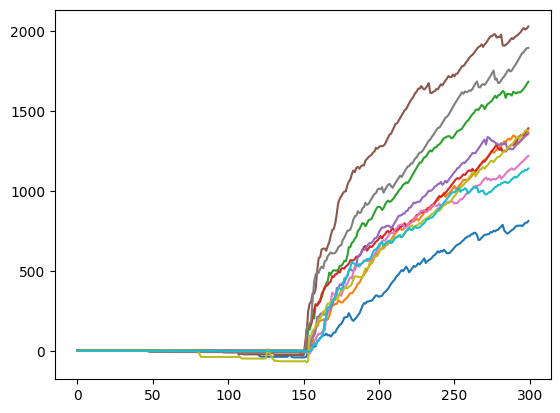

In [7]:
S = train_params([0.2], [0.5], [8e-5]).T
plt.plot(S)
plt.show()

threshold =  79.43265341582719
eta = 0.2, lambda = 0.7, alpha = 0.0001  False alarms: 0 DD :  7.1 ± 5.0 not detected:  0


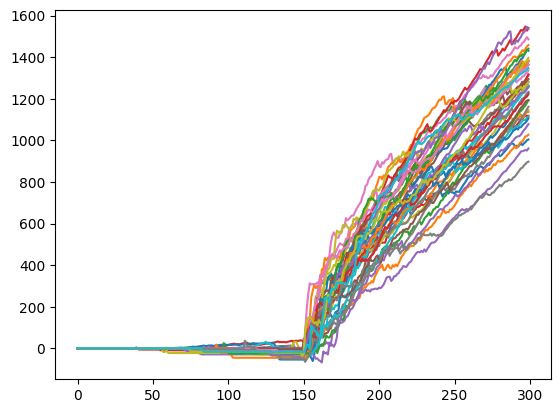

In [38]:
S = train_params([0.2], [0.7], [1e-4]).T
plt.plot(S)
plt.show()

threshold =  0.0
eta = 0.002, lambda = 0.5, alpha = 0.0  False alarms: 0 DD :  0 ± 0 not detected:  10
threshold =  0.0
eta = 0.002, lambda = 0.5, alpha = 0.0001  False alarms: 0 DD :  0 ± 0 not detected:  10
threshold =  0.0
eta = 0.002, lambda = 0.5, alpha = 0.003  False alarms: 0 DD :  0 ± 0 not detected:  10
threshold =  0.0
eta = 0.002, lambda = 0.5, alpha = 0.01  False alarms: 0 DD :  0 ± 0 not detected:  10
threshold =  0.0
eta = 0.002, lambda = 1, alpha = 0.0  False alarms: 0 DD :  0 ± 0 not detected:  10
threshold =  0.0
eta = 0.002, lambda = 1, alpha = 0.0001  False alarms: 0 DD :  0 ± 0 not detected:  10
threshold =  0.0
eta = 0.002, lambda = 1, alpha = 0.003  False alarms: 0 DD :  0 ± 0 not detected:  10
threshold =  0.0
eta = 0.002, lambda = 1, alpha = 0.01  False alarms: 0 DD :  0 ± 0 not detected:  10
threshold =  0.0
eta = 0.002, lambda = 5, alpha = 0.0  False alarms: 0 DD :  0 ± 0 not detected:  10
threshold =  0.0
eta = 0.002, lambda = 5, alpha = 0.0001  False alarms:

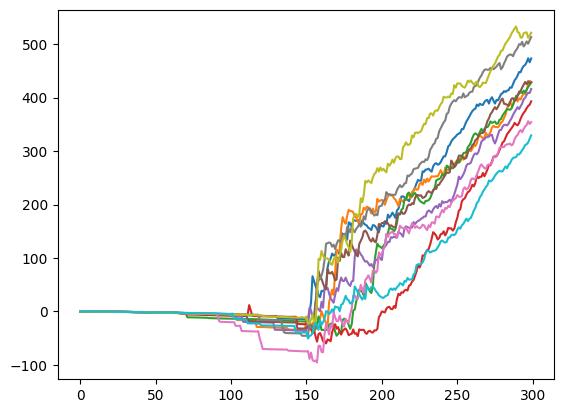

In [32]:
S = train_params([0.002, 0.02, 0.2, 1], [0.5, 1, 5, 15], [1e-5, 1e-4, 3e-3, 1e-2]).T
plt.plot(S)
plt.show()

## Univariate variance shift 

In [13]:


def train_params(eta_list, lambda_list, alpha_list, gamma=0, thrs_add=0):
    n = 300
    tau = 150
    runs = 10
    sigma1 = 0.1
    sigma2 = 0.3
    dim = 1

    np.random.seed(1)
    for eta in eta_list:
        for l in lambda_list:
            for a in alpha_list:
                
                # threshold 
                S_0 = np.empty((9, tau))
                for item in range(9):
                    X = sigma1 * randn(size=tau).reshape((tau, dim, 1))                
                    model = ChangePointDetector(d_dim=dim*2, x_dim=1, lambda_=l, alpha=a, gamma=gamma, basis=PolyBasis(2, dim))
                    S, _ = model.run(X, eta)
                    S_0[item] = S
                threshold = np.max(S_0) + thrs_add
                print('threshold = ', threshold)

                S_list = np.empty((runs, n))
                for item in range(runs):
                    X = randn(size=n).reshape((n, dim, 1))      
                    X[:tau] *= sigma1
                    X[tau:] *= sigma2        
                    model = ChangePointDetector(d_dim=dim*2, x_dim=1, lambda_=l, alpha=a, gamma=gamma, basis=PolyBasis(2, dim))
                    S, _ = model.run(X, eta)
                    S_list[item] = S

                false_alarms, mean_delay, std_delay, not_detected = compute_delays_false_alarms(runs, S_list, threshold, tau)
                print(f'eta = {np.round(eta, 4)}, lambda = {np.round(l, 4)}, alpha = {np.round(a, 5)}', ' False alarms:', false_alarms, 'DD : ', mean_delay, '±', std_delay, 'not detected: ', not_detected)
    return S_list, S_0

In [1]:
S = train_params([0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1], [0.8, 1, 1.5], [7e-5, 1e-4,3e-4]).T
plt.plot(S)
plt.show()


threshold =  55.03394774062852
150 8
eta = 0.3, lambda = 0.8, alpha = 0.0001  False alarms: 1 DD :  4.6 ± 3.3 not detected:  0
threshold =  22.306642151426583
eta = 0.3, lambda = 0.8, alpha = 0.0001  False alarms: 0 DD :  5.2 ± 3.4 not detected:  0
threshold =  22.849609948546256
eta = 0.3, lambda = 0.8, alpha = 0.0003  False alarms: 0 DD :  4.1 ± 2.5 not detected:  0
threshold =  0.17411665267925636
150 0
eta = 0.3, lambda = 1, alpha = 0.0001  False alarms: 1 DD :  3.1 ± 2.2 not detected:  0
threshold =  76.54995167304767
eta = 0.3, lambda = 1, alpha = 0.0001  False alarms: 0 DD :  5.0 ± 3.0 not detected:  0
threshold =  73.20691905987204
eta = 0.3, lambda = 1, alpha = 0.0003  False alarms: 0 DD :  3.1 ± 1.8 not detected:  0
threshold =  0.453120842728165
86 0
eta = 0.3, lambda = 1.5, alpha = 0.0001  False alarms: 1 DD :  3.6 ± 3.8 not detected:  0
threshold =  0.7456656879842536
140 0
125 6
eta = 0.3, lambda = 1.5, alpha = 0.0001  False alarms: 2 DD :  2.4 ± 2.1 not detected:  0
thre

eta = 0.7, lambda = 1, alpha = 0.0001  False alarms: 0 DD :  6.0 ± 4.7 not detected:  0


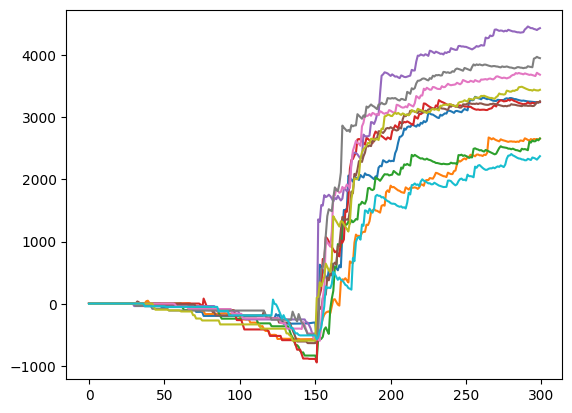

In [30]:
S = train_params([0.7], [1], [1e-4]).T
plt.plot(S)
plt.show()

122 9
eta = 0.7, lambda = 1.5, alpha = 0.0001  False alarms: 1 DD :  5.1 ± 3.8 not detected:  0


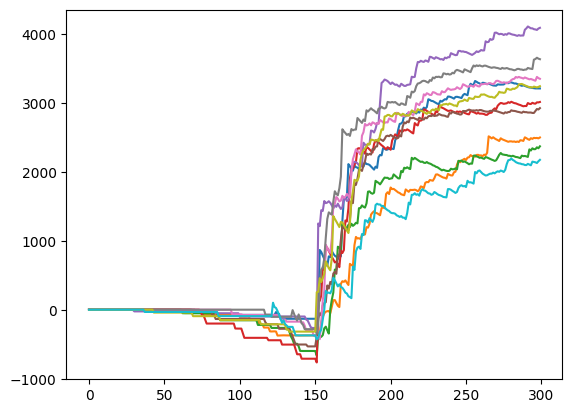

In [31]:
S = train_params([0.7], [1.5], [1e-4]).T
plt.plot(S)
plt.show()

122 9
eta = 0.6, lambda = 1.5, alpha = 0.0001  False alarms: 1 DD :  5.0 ± 3.4 not detected:  0


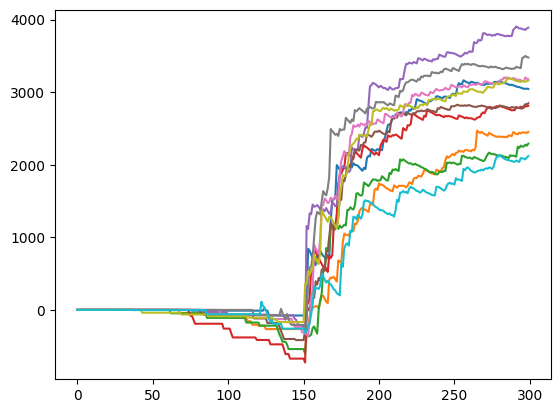

In [32]:
S = train_params([0.6], [1.5], [1e-4]).T
plt.plot(S)
plt.show()

eta = 0.5, lambda = 1.5, alpha = 0.0001  False alarms: 0 DD :  4.4 ± 3.1 not detected:  0


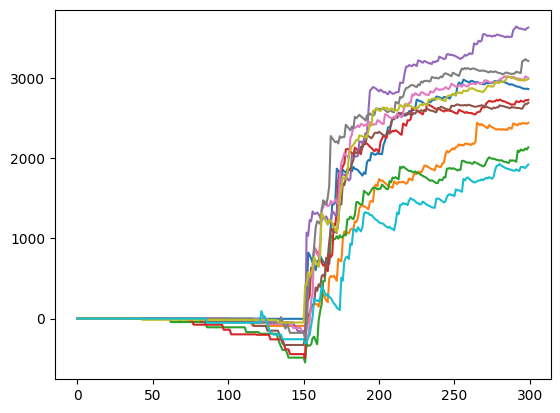

In [33]:
S = train_params([0.5], [1.5], [1e-4]).T
plt.plot(S)
plt.show()

122 9
eta = 0.4, lambda = 1.5, alpha = 0.0001  False alarms: 1 DD :  3.8 ± 2.8 not detected:  0


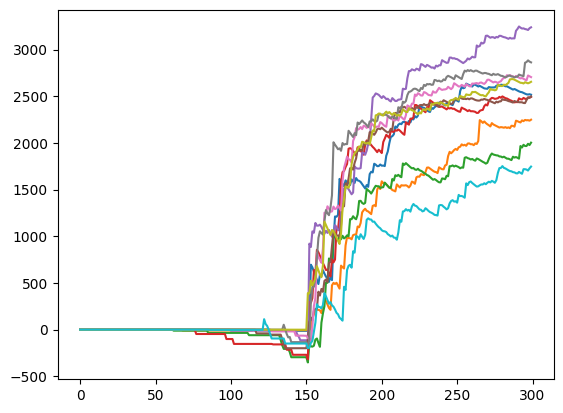

In [34]:
S = train_params([0.4], [1.5], [1e-4]).T
plt.plot(S)
plt.show()

eta = 0.3, lambda = 1.5, alpha = 0.0001  False alarms: 0 DD :  4.0 ± 2.6 not detected:  0


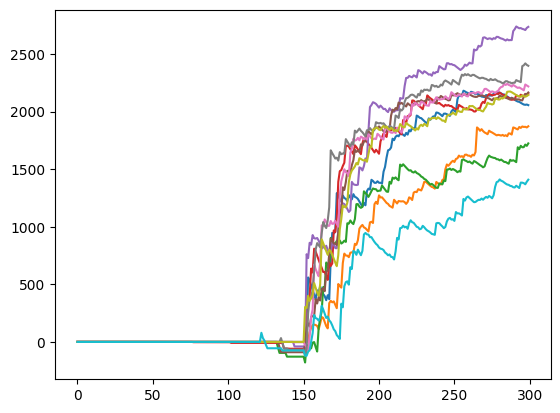

In [35]:
S = train_params([0.3], [1.5], [1e-4]).T
plt.plot(S)
plt.show()

threshold =  0.0
eta = 0.2, lambda = 1.5, alpha = 0.0001  False alarms: 0 DD :  3.3 ± 1.7 not detected:  0


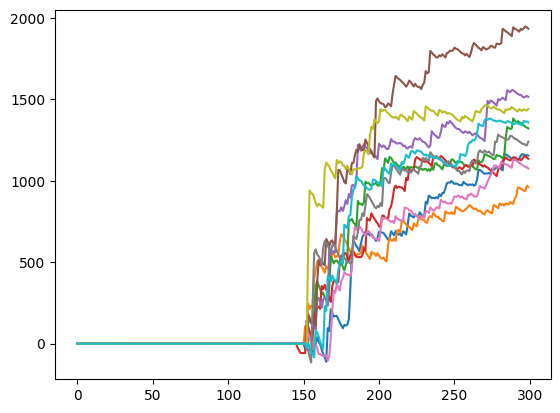

In [14]:
#final
S, S0 = train_params([0.2], [1.5], [1e-4])
plt.plot(S.T)
plt.show()

## Multivariate mean shift

### linear 

In [18]:



dim = 3
mean = np.zeros(dim)
cov = np.eye(dim)

def train_params(eta_list, lambda_list, alpha_list, sigma, gamma_list=[], thrs_add=0):
    gamma_list = np.zeros(len(lambda_list)) if len(gamma_list) == 0 else gamma_list
    n = 300
    tau = 150
    runs = 10

    np.random.seed(1)
    for eta in eta_list:
        for i, l in enumerate(lambda_list):
            g = gamma_list[i]
            for a in alpha_list:
                
                # threshold 
                S_0 = np.empty((9, tau))
                for item in range(9):
                    X = randmn(mean, cov, size=tau).reshape((tau, dim, 1)) * sigma[None, :, None]       
                    model = ChangePointDetector(d_dim=dim, x_dim=dim, lambda_=l, alpha=a, basis=PolyBasis(1, dim), reference_score=reference_score)
                    S, _ = model.run(X, eta)
                    S_0[item] = S
                    
                threshold = np.max(S_0) + thrs_add
                print('threshold = ', threshold)


                S_list = np.empty((runs, n))
                for item in range(runs):
                    X = randmn(mean, cov, size=n).reshape((n, dim, 1)) * sigma[None, :, None]         
                    X[tau:] += 3*sigma[:, None]
                    model = ChangePointDetector(d_dim=dim, x_dim=dim, lambda_=l, alpha=a, basis=PolyBasis(1, dim), reference_score=reference_score)
                    S, _ = model.run(X, eta)
                    S_list[item] = S

                false_alarms, mean_delay, std_delay, not_detected = compute_delays_false_alarms(runs, S_list, threshold, tau)
                if isinstance(eta, Iterable):
                    eta=0
                print(f'eta = {np.round(eta, 4)}, lambda = {np.round(l, 4)}, alpha = {np.round(a, 4)}', ' False alarms:', false_alarms, 'DD : ', mean_delay, '±', std_delay, 'not detected: ', not_detected)
    return S_list


In [ ]:
sigma = np.array([0.1, 0.2, 0.3])
S = train_params([0.05, 0.1, 0.5, 1 ], [0.5, 0.8,  1, 1.5, 3, 4], [1e-5, 1e-4, 1e-3, 1e-2, 5e-2], sigma=sigma, thrs_add = 0.01)
plt.plot(S.T)
plt.show()

threshold =  0.01715607481874725
eta = 1, lambda = 5, alpha = 0.0  False alarms: 0 DD :  16.8 ± 1.2 not detected:  0
threshold =  0.01318203589618414
eta = 1, lambda = 5, alpha = 0.0001  False alarms: 0 DD :  10.9 ± 1.1 not detected:  0
threshold =  0.02608100736273585
eta = 1, lambda = 5, alpha = 0.001  False alarms: 0 DD :  7.3 ± 1.1 not detected:  0
threshold =  0.06414805272768424
65 9
eta = 1, lambda = 5, alpha = 0.01  False alarms: 1 DD :  4.1 ± 0.9 not detected:  0
threshold =  0.4369200241493658
eta = 1, lambda = 5, alpha = 0.05  False alarms: 0 DD :  4.7 ± 1.3 not detected:  0
threshold =  0.011779455326046425
eta = 1, lambda = 8, alpha = 0.0  False alarms: 0 DD :  16.1 ± 1.3 not detected:  0
threshold =  0.015541845899091236
eta = 1, lambda = 8, alpha = 0.0001  False alarms: 0 DD :  12.2 ± 1.2 not detected:  0
threshold =  0.01777868707388782
eta = 1, lambda = 8, alpha = 0.001  False alarms: 0 DD :  6.2 ± 1.2 not detected:  0
threshold =  0.04121401472867763
107 7
eta = 1, la

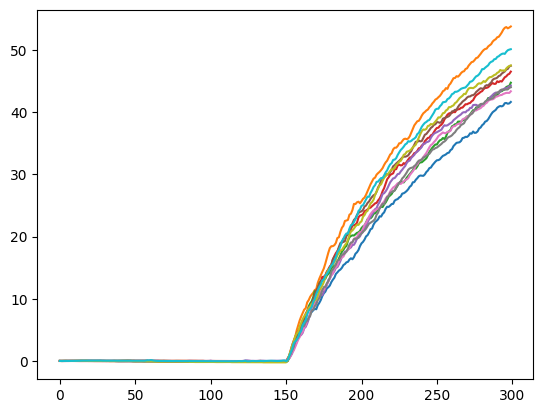

In [16]:
sigma = np.array([0.1, 0.2, 0.3])
S = train_params([1,1.5, 5, 8, 10 ], [5, 8, 10, 14], [1e-5, 1e-4, 1e-3, 1e-2, 5e-2], sigma=sigma, thrs_add = 0.01)
plt.plot(S.T)
plt.show()

threshold =  0.0658631983847003
eta = 10, lambda = 10, alpha = 0.001  False alarms: 0 DD :  1.9 ± 0.3 not detected:  0


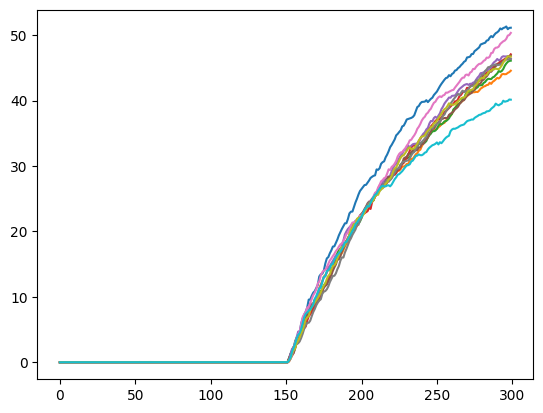

In [21]:
sigma = np.array([0.1, 0.2, 0.3])
S = train_params([10], [10], [1e-3], sigma=sigma, thrs_add = 0.01)
plt.plot(S.T)
plt.show()

threshold =  0.0658631983847003
eta = 10, lambda = 10, alpha = 0.001  False alarms: 0 DD :  1.9 ± 0.3 not detected:  0


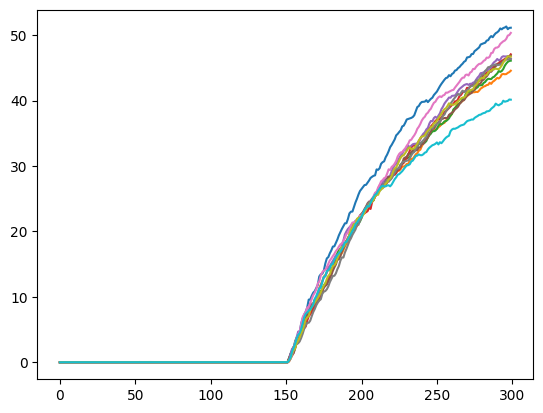

In [19]:
sigma = np.array([0.1, 0.2, 0.3])
S = train_params([10], [10], [1e-3], sigma=sigma, thrs_add = 0.01)
plt.plot(S.T)
plt.show()

### quadratic

In [27]:



dim = 3
mean = np.zeros(dim)
cov = np.eye(dim)

def train_params(eta_list, lambda_list, alpha_list, sigma, gamma_list=[], thrs_add=0):
    gamma_list = np.zeros(len(lambda_list)) if len(gamma_list) == 0 else gamma_list
    n = 300
    tau = 150
    runs = 10

    np.random.seed(1)
    for eta in eta_list:
        for i, l in enumerate(lambda_list):
            g = gamma_list[i]
            for a in alpha_list:
                
                # threshold 
                S_0 = np.empty((9, tau))
                for item in range(9):
                    X = randmn(mean, cov, size=tau).reshape((tau, dim, 1)) * sigma[None, :, None]       
                    model = ChangePointDetector(d_dim=dim*2, x_dim=dim, lambda_=l, alpha=a, basis=PolyBasis(2, dim))
                    S, _ = model.run(X, eta)
                    S_0[item] = S
                    
                threshold = np.max(S_0) + thrs_add
                print('threshold = ', threshold)


                S_list = np.empty((runs, n))
                for item in range(runs):
                    X = randmn(mean, cov, size=n).reshape((n, dim, 1)) * sigma[None, :, None]         
                    X[tau:] += 3*sigma[:, None]
                    model = ChangePointDetector(d_dim=dim*2, x_dim=dim, lambda_=l, alpha=a, basis=PolyBasis(2, dim))
                    S, _ = model.run(X, eta)
                    S_list[item] = S

                false_alarms, mean_delay, std_delay, not_detected = compute_delays_false_alarms(runs, S_list, threshold, tau)
                if isinstance(eta, Iterable):
                    eta=0
                print(f'eta = {np.round(eta, 4)}, lambda = {np.round(l, 4)}, alpha = {np.round(a, 5)}', ' False alarms:', false_alarms, 'DD : ', mean_delay, '±', std_delay, 'not detected: ', not_detected)
    return S_list


In [ ]:
sigma = np.array([0.1, 0.2, 0.3])
S = train_params([0.5, 0.8], [1, 1.5, 3, 5], [1e-7, 1e-6, 1e-4, 1e-3, 1e-2], sigma=sigma, thrs_add = 0)
plt.plot(S.T)
plt.show()

threshold =  47.86569677397847
eta = 0.8, lambda = 1.4, alpha = 0.0  False alarms: 0 DD :  2.2 ± 0.7 not detected:  0
threshold =  26.774609532889826
1 7
1 9
eta = 0.8, lambda = 1.5, alpha = 0.0  False alarms: 2 DD :  2.2 ± 0.8 not detected:  0
threshold =  29.49421370558457
eta = 0.8, lambda = 1.6, alpha = 0.0  False alarms: 0 DD :  2.3 ± 0.9 not detected:  0


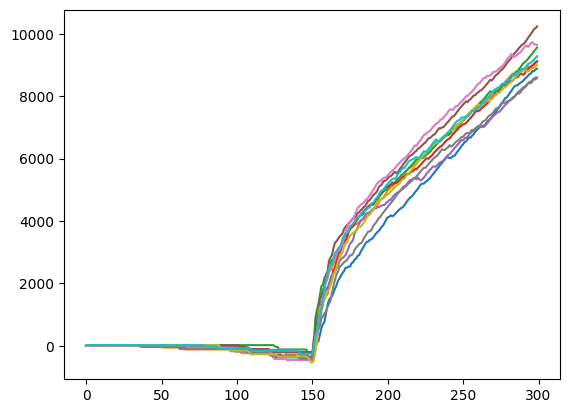

In [24]:
sigma = np.array([0.1, 0.2, 0.3])
S = train_params([ 0.8], [1.4], [1e-7], sigma=sigma, thrs_add = 0)
S = train_params([ 0.8], [1.5], [1e-7], sigma=sigma, thrs_add = 0)
S = train_params([ 0.8], [ 1.6], [1e-7], sigma=sigma, thrs_add = 0)

plt.plot(S.T)
plt.show()

threshold =  29.49421370558457
eta = 0.8, lambda = 1.6, alpha = 0.0  False alarms: 0 DD :  2.3 ± 0.9 not detected:  0


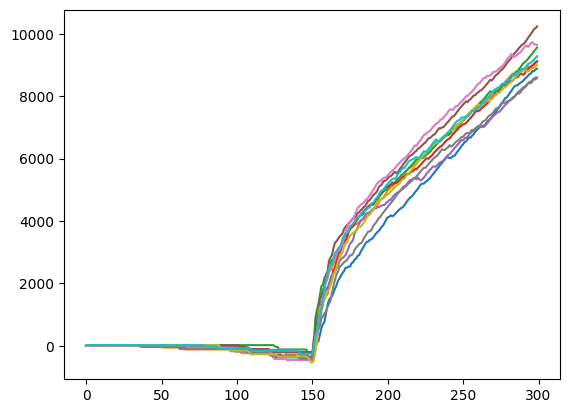

In [28]:
sigma = np.array([0.1, 0.2, 0.3])
S = train_params([ 0.8], [ 1.6], [1e-7], sigma=sigma, thrs_add = 0)

plt.plot(S.T)
plt.show()

## Multivariate variance shift 

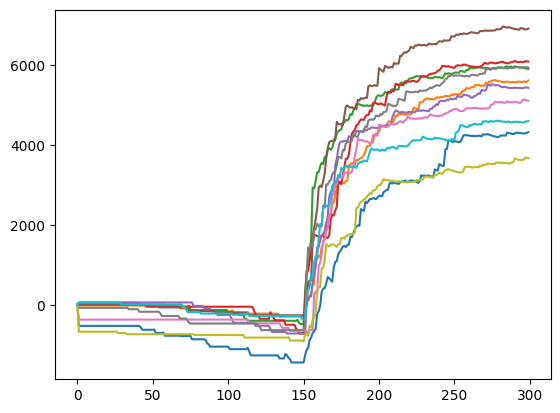

In [25]:
#quadratic 


dim = 3
n = 300
tau = 150
runs = 10

sigma1 = np.array([0.1, 0.2, 0.3])
sigma2 = np.array([0.3, 0.6, 0.9])


mean = np.zeros(dim)
cov = np.eye(dim)


S_list = np.empty((runs, n))


np.random.seed(1)

for item in range(runs):

    X = randmn(mean, cov, size=n).reshape((n, dim, 1))
    X[:tau] *= sigma1[:, None]
    X[tau:] *= sigma2[:, None]
    
    model = ChangePointDetector(dim*2, x_dim=dim, lambda_= 1.5, alpha=1e-7, basis=PolyBasis(2, dim)) 
    model.run(X, 1)
    S_list[item] = model.test_statistic


plt.plot(S_list.T)
plt.show()



In [26]:
# threshold 
S_0 = np.empty((9, tau))
for item in range(9):
    X = randmn(mean, cov, size=tau).reshape((tau, dim, 1)) * sigma[None, :, None]       
    model = ChangePointDetector(d_dim=dim*2, x_dim=dim, lambda_=1.5, alpha=1e-7, gamma=0, basis=PolyBasis(2, dim))
    S, _ = model.run(X, 1)
    S_0[item] = S
    
threshold = np.max(S_0)
print('threshold = ', threshold)


threshold =  123.92824145462669


In [27]:
false_alarms, mean_delay, std_delay, nd = compute_delays_false_alarms(runs, S_list,threshold , tau)
print('Quadratic basis. False alarms:', false_alarms)
print('Quadratic basis', mean_delay, '±', std_delay, 'nd:', nd)

Quadratic basis. False alarms: 0
Quadratic basis 4.1 ± 3.6 nd: 0


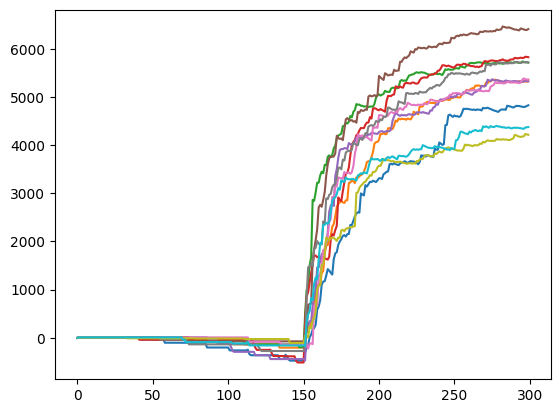

In [58]:
#quadratic 


dim = 3
n = 300
tau = 150
runs = 10

sigma1 = np.array([0.1, 0.2, 0.3])
sigma2 = np.array([0.3, 0.6, 0.9])


mean = np.zeros(dim)
cov = np.eye(dim)


S_list = np.empty((runs, n))


np.random.seed(1)

for item in range(runs):

    X = randmn(mean, cov, size=n).reshape((n, dim, 1))
    X[:tau] *= sigma1[:, None]
    X[tau:] *= sigma2[:, None]
    
    model = ChangePointDetector(dim*2, x_dim=dim, lambda_= 1.5, alpha=1e-5, basis=PolyBasis(2, dim)) 
    model.run(X, 0.7)
    S_list[item] = model.test_statistic


plt.plot(S_list.T)
plt.show()



In [59]:
# threshold 
S_0 = np.empty((19, tau))
for item in range(19):
    X = randmn(mean, cov, size=tau).reshape((tau, dim, 1)) * sigma[None, :, None]       
    model = ChangePointDetector(d_dim=dim*2, x_dim=dim, lambda_=1.5, alpha=1e-5, gamma=0, basis=PolyBasis(2, dim))
    S, _ = model.run(X, 0.7)
    S_0[item] = S
    
threshold = np.max(S_0)
print('threshold = ', threshold)


threshold =  126.79673831755645


In [60]:
false_alarms, mean_delay, std_delay, nd = compute_delays_false_alarms(runs, S_list,threshold , tau)
print('Quadratic basis. False alarms:', false_alarms)
print('Quadratic basis', mean_delay, '±', std_delay, 'nd:', nd)

Quadratic basis. False alarms: 0
Quadratic basis 3.0 ± 1.9 nd: 0


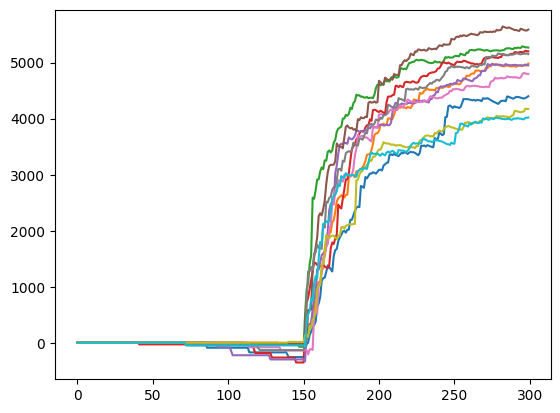

In [55]:
#quadratic 


dim = 3
n = 300
tau = 150
runs = 10

sigma1 = np.array([0.1, 0.2, 0.3])
sigma2 = np.array([0.3, 0.6, 0.9])


mean = np.zeros(dim)
cov = np.eye(dim)


S_list = np.empty((runs, n))


np.random.seed(1)

for item in range(runs):

    X = randmn(mean, cov, size=n).reshape((n, dim, 1))
    X[:tau] *= sigma1[:, None]
    X[tau:] *= sigma2[:, None]
    
    model = ChangePointDetector(dim*2, x_dim=dim, lambda_= 1.5, alpha=1e-5, basis=PolyBasis(2, dim)) 
    model.run(X, 0.5)
    S_list[item] = model.test_statistic


plt.plot(S_list.T)
plt.show()



In [56]:
# threshold 
S_0 = np.empty((19, tau))
for item in range(19):
    X = randmn(mean, cov, size=tau).reshape((tau, dim, 1)) * sigma[None, :, None]       
    model = ChangePointDetector(d_dim=dim*2, x_dim=dim, lambda_=1.5, alpha=1e-5, gamma=0, basis=PolyBasis(2, dim))
    S, _ = model.run(X, 0.5)
    S_0[item] = S
    
threshold = np.max(S_0)
print('threshold = ', threshold)


threshold =  96.91279655701055


In [57]:
false_alarms, mean_delay, std_delay, nd = compute_delays_false_alarms(runs, S_list,threshold , tau)
print('Quadratic basis. False alarms:', false_alarms)
print('Quadratic basis', mean_delay, '±', std_delay, 'nd:', nd)

Quadratic basis. False alarms: 0
Quadratic basis 2.5 ± 1.7 nd: 0


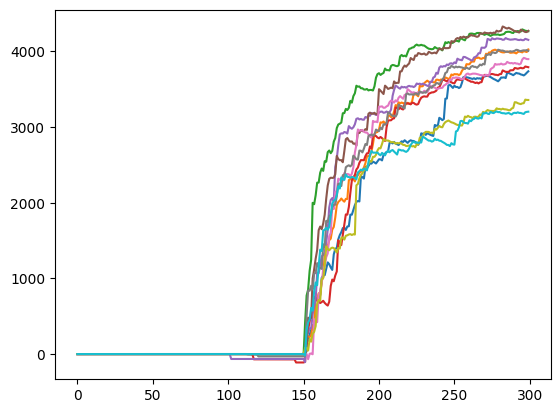

threshold =  11.924405105177357
Quadratic basis. False alarms: 0
Quadratic basis 2.1 ± 1.7 nd: 0


In [34]:
#quadratic 


dim = 3
n = 300
tau = 150
runs = 10

sigma1 = np.array([0.1, 0.2, 0.3])
sigma2 = np.array([0.3, 0.6, 0.9])


mean = np.zeros(dim)
cov = np.eye(dim)


S_list = np.empty((runs, n))


np.random.seed(1)

for item in range(runs):

    X = randmn(mean, cov, size=n).reshape((n, dim, 1))
    X[:tau] *= sigma1[:, None]
    X[tau:] *= sigma2[:, None]
    
    model = ChangePointDetector(dim*2, x_dim=dim, lambda_= 1.5, alpha=1e-5, basis=PolyBasis(2, dim)) 
    model.run(X, 0.3)
    S_list[item] = model.test_statistic


plt.plot(S_list.T)
plt.show()

# threshold 
S_0 = np.empty((19, tau))
for item in range(19):
    X = randmn(mean, cov, size=tau).reshape((tau, dim, 1)) * sigma[None, :, None]       
    model = ChangePointDetector(d_dim=dim*2, x_dim=dim, lambda_=1.5, alpha=1e-5, gamma=0, basis=PolyBasis(2, dim))
    S, _ = model.run(X, 0.3)
    S_0[item] = S
    
threshold = np.max(S_0)
print('threshold = ', threshold)

false_alarms, mean_delay, std_delay, nd = compute_delays_false_alarms(runs, S_list,threshold , tau)
print('Quadratic basis. False alarms:', false_alarms)
print('Quadratic basis', mean_delay, '±', std_delay, 'nd:', nd)

threshold =  0.43173328247848985


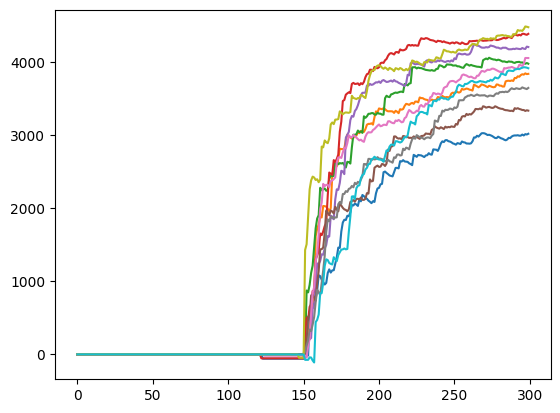

In [32]:
#quadratic 


dim = 3
n = 300
tau = 150
runs = 10

sigma1 = np.array([0.1, 0.2, 0.3])
sigma2 = np.array([0.3, 0.6, 0.9])


mean = np.zeros(dim)
cov = np.eye(dim)


S_list = np.empty((runs, n))


np.random.seed(1)

# threshold 
S_0 = np.empty((9, tau))
for item in range(9):
    X = randmn(mean, cov, size=tau).reshape((tau, dim, 1)) * sigma[None, :, None]       
    model = ChangePointDetector(d_dim=dim*2, x_dim=dim, lambda_=1.5, alpha=1e-5, gamma=0, basis=PolyBasis(2, dim))
    S, _ = model.run(X, 0.3)
    S_0[item] = S
    
threshold = np.max(S_0)
print('threshold = ', threshold)



for item in range(runs):
    X = randmn(mean, cov, size=n).reshape((n, dim, 1))
    X[:tau] *= sigma1[:, None]
    X[tau:] *= sigma2[:, None]
    
    model = ChangePointDetector(dim*2, x_dim=dim, lambda_= 1.5, alpha=1e-5, basis=PolyBasis(2, dim)) 
    model.run(X, 0.3)
    S_list[item] = model.test_statistic

plt.plot(S_list.T)
plt.show()


In [33]:


false_alarms, mean_delay, std_delay, nd = compute_delays_false_alarms(runs, S_list,  0.43173328247848985, tau)
print('Quadratic basis. False alarms:', false_alarms)
print('Quadratic basis', mean_delay, '±', std_delay, 'nd:', nd)

138 7
Quadratic basis. False alarms: 1
Quadratic basis 2.3 ± 2.2 nd: 0
